In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
df=pd.read_csv("mw_pw_profiles.csv")
df.head()

/var/folders/_w/hzx2gf556w1dq5_ps720t3lw0000gn/T/ipykernel_4335/3618847381.py:1: DtypeWarning: Columns (32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("mw_pw_profiles.csv")


,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,player_out,...,key_pulse,key_pulse_2,full_name,batting_style,bowling_style,playing_role,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,00015688,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,T20,M King,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],5,8,17
1,00015688,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],3,0,7
2,00015688,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],1,0,5
3,00015688,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,0,4
4,00015688,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],-5,0,-1


In [181]:
df_n = df.dropna(axis=1, how='all')

In [182]:
df_n.head()

,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,player_out,...,key_nvplay,key_nvplay_2,key_opta,key_opta_2,key_pulse,key_pulse_2,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,00015688,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,T20,M King,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],5,8,17
1,00015688,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],3,0,7
2,00015688,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],1,0,5
3,00015688,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,0,4
4,00015688,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],-5,0,-1


In [183]:
z= df_n[df_n['match_type'] == "T20"]
x = z[['runs_scored', 'fours_scored', 'balls_faced','sixes_scored']].values
y = z['fantasy_score_batting'].values
z.head()

,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,player_out,...,key_nvplay,key_nvplay_2,key_opta,key_opta_2,key_pulse,key_pulse_2,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,00015688,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,T20,M King,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],5,8,17
1,00015688,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],3,0,7
2,00015688,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],1,0,5
3,00015688,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,0,4
4,00015688,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],-5,0,-1


In [184]:
def linear_regression(x, y):
    x_n = np.c_[np.ones((len(x))), x]  
    xTx = np.dot(x_n.T, x_n)
    xTy = np.dot(x_n.T, y)
    theta = np.linalg.solve(xTx, xTy)
    return theta

In [185]:
theta = linear_regression(x,y)
print("Intercept and Slope:", theta)

Intercept and Slope: [-0.22454916  1.38051639  0.92006998 -0.28555282  1.72950667]


In [186]:
def y_predicted(x,theta):
    x_n = np.c_[np.ones((len(x))), x]  
    y_n=np.dot(x_n,theta)
    return y_n

In [187]:
y_n=y_predicted(x,theta)
print(y_n)

[ 5.93410015  6.5997012  -0.27179687 ... 35.8753273  -0.22454916
  7.50360737]


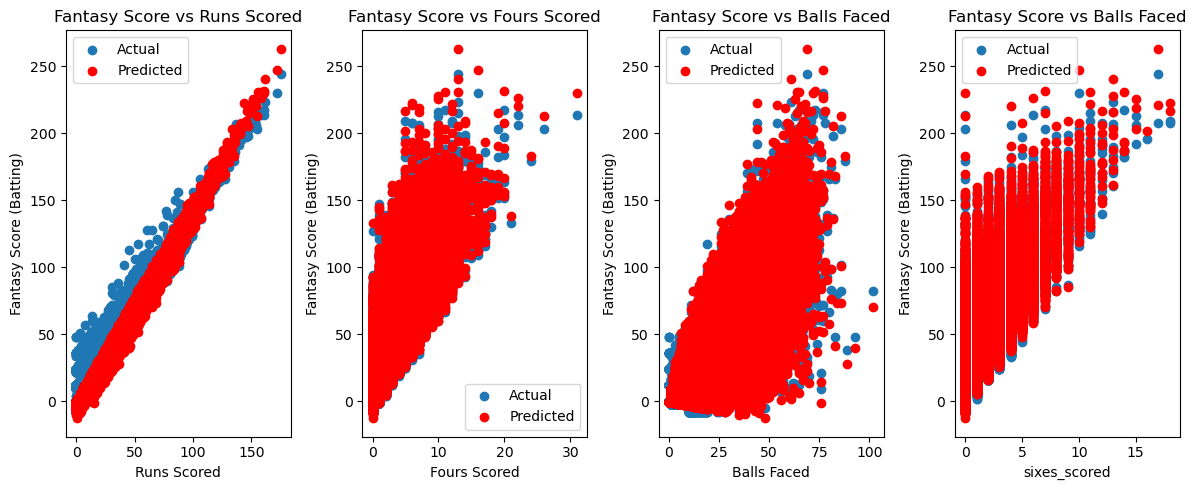

In [188]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
plt.scatter(z['runs_scored'], z['fantasy_score_batting'], label='Actual')
plt.scatter(z['runs_scored'], y_n, color='red', label='Predicted')
plt.xlabel('Runs Scored')
plt.ylabel('Fantasy Score (Batting)')
plt.title('Fantasy Score vs Runs Scored')
plt.legend()

plt.subplot(1, 4, 2)
plt.scatter(z['fours_scored'], z['fantasy_score_batting'], label='Actual')
plt.scatter(z['fours_scored'], y_n, color='red', label='Predicted')
plt.xlabel('Fours Scored')
plt.ylabel('Fantasy Score (Batting)')
plt.title('Fantasy Score vs Fours Scored')
plt.legend()

plt.subplot(1, 4, 3)
plt.scatter(z['balls_faced'], z['fantasy_score_batting'], label='Actual')
plt.scatter(z['balls_faced'], y_n, color='red', label='Predicted')
plt.xlabel('Balls Faced')
plt.ylabel('Fantasy Score (Batting)')
plt.title('Fantasy Score vs Balls Faced')
plt.legend()

plt.subplot(1, 4, 4)
plt.scatter(z['sixes_scored'], z['fantasy_score_batting'], label='Actual')
plt.scatter(z['sixes_scored'], y_n, color='red', label='Predicted')
plt.xlabel('sixes_scored')
plt.ylabel('Fantasy Score (Batting)')
plt.title('Fantasy Score vs Balls Faced')
plt.legend()

plt.tight_layout()
plt.show()

In [189]:
from sklearn.metrics import r2_score

In [190]:
r2 = r2_score(y, y_n)
print("R-squared value:", r2)

mse = mean_squared_error(y, y_n)
print("Mean Squared Error (MSE):", mse)

R-squared value: 0.9906233723209775
Mean Squared Error (MSE): 5.550001477431419


In [191]:
x = df[['catches_taken','run_out_direct', 'run_out_throw', 'stumpings_done','balls_bowled', 'runs_conceded','wickets_taken', 'bowled_done', 'lbw_done', 'maidens','dot_balls_as_bowler']]
y = df['fantasy_score_bowling']

In [192]:
theta = linear_regression(x,y)
print("Intercept and Slope:", theta)

Intercept and Slope: [ 1.90769525  7.71822686 12.49355269  6.41934084 -1.20055107  0.48051793
 -0.2279733  24.7862491   9.0494103   5.94417284 -0.46981584 -0.61796868]


In [193]:
y_n=y_predicted(x,theta)
print(y_n)

[9.6259221  1.90769525 1.90769525 ... 9.6259221  1.90769525 9.6259221 ]


In [194]:
r2 = r2_score(y, y_n)
print("R-squared value:", r2)

R-squared value: 0.9651943953429141


In [195]:
from sklearn.metrics import mean_squared_error

In [196]:
mse = mean_squared_error(y, y_n)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 32.819352872095536
